# 2-wymiarowy rozkład Normalny

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy.stats as stats
from scipy.stats import multivariate_normal

# Zadanie 
Proszę wygenerować próbkę z rozkładu Normalnego
$$
m = [0,0]
$$

oraz

$$
\Sigma = [[4.40, -2.75], [-2.75,  5.50]]
$$

In [78]:
mean1 = np.array([0, 0])
cov1 = np.array([[4.40, -2.75], [-2.75,  5.50]])
X1_rv=multivariate_normal(mean1, cov1)
X = X1_rv.rvs(1000)

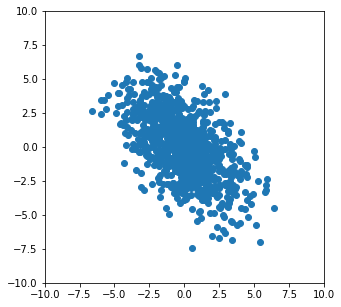

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.show()

# Zadanie 
Proszę policzyć średnią oraz macierz kowariancji próbki.

In [80]:
means = X.mean(axis=0)
cov = np.cov(X.T)
print(means)
print(cov)

[-0.0268888  0.0019818]
[[ 4.25060772 -2.68275264]
 [-2.68275264  5.43151925]]


# Zadanie
Proszę zdefiniować zmienną losową o razkładzie zadanym na podstawie empirycznej średniej i kowariancji oraz narysować na jednym wykresie:

- próbkę
- poziomice rozkładu normalnego 

In [81]:
X2_rv=multivariate_normal(means, cov)
X= X2_rv.rvs(1000) 

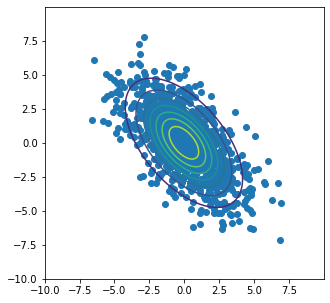

In [82]:
fig, ax = plt.subplots(figsize= (5,5))
ax.scatter(X[:,0],X[:,1])

x, y = np.mgrid[-10:10:.01,-10:10:.01]
ax.contour(x,y,X2_rv.pdf(np.dstack((x,y))))
plt.show()

# Zadanie
Policz wektory i wartości własne macierzy kowariancji. Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

[2.09410157 7.5880254 ]
[[-0.77940639  0.62651869]
 [-0.62651869 -0.77940639]]


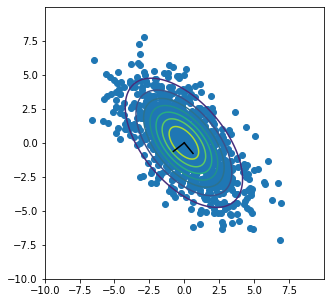

In [83]:
fig, ax = plt.subplots(figsize= (5,5))
ax.scatter(X[:,0],X[:,1])

x, y = np.mgrid[-10:10:.01,-10:10:.01]
ax.contour(x,y,X2_rv.pdf(np.dstack((x,y))))


val =np.linalg.eigvals(cov)
val, vect =np.linalg.eig(cov)

ax.plot([0,vect[0][0]],[0,vect[1][0]],color="black")
ax.plot([0,vect[0][1]],[0,vect[1][1]],color="black")

print(val)
print(vect)
plt.show()

# Zadanie 
Proszę wygenerować próbkę na kwadracie $[0,1] \times [0,1]$.
Następnie proszę policzyć średnią oraz macierz kowariancji próbki.

Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

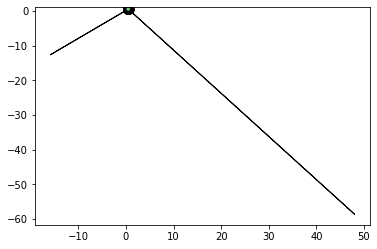

In [103]:
mean1 = np.array([0.5, 0.5])
cov1 = np.array([[0.02,0.001],[0.001,0.02]])
X1_rv=multivariate_normal(mean1, cov1)
X = X1_rv.rvs(1000)

X[X>1] -= np.random.uniform()
X[X<0] += np.random.uniform()

vals, vects = np.linalg.eig(cov)
v1 = vals[0]*normalize(vect[:,0])
v2 = vals[1]*normalize(vect[:,1])

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

plt.scatter(X[:,0],X[:,1], zorder=1,c='#000000')
# ax.scatter(X[:,0],X[:,1])

x = np.linspace(0,1,1000)
y = np.linspace(0,1,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

startpoint = [0.5,0.5]
size = 0.05
plt.arrow(*startpoint,*(10*v1), width=size/4,head_width=size, head_length=size)
plt.arrow(*startpoint,*(10*v2), width=size/4,head_width=size, head_length=size)
plt.contour(X,Y,X1_rv.pdf(pos))

# size2 = [0,1]
# ax.set_xlim(size2)
# ax.set_ylim(size2)
plt.show()

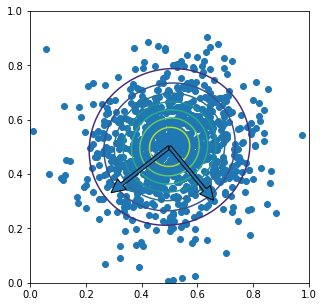

In [119]:
mean1 = np.array([0.5, 0.5])
cov1 = np.array([[0.02,0.001],[0.001,0.02]])
X1_rv=multivariate_normal(mean1, cov1)
X = X1_rv.rvs(1000)

X[X>1] -= np.random.uniform()
X[X<0] += np.random.uniform()

vals, vects = np.linalg.eig(cov)
v1 = vals[0]*normalize(vect[:,0])
v2 = vals[1]*normalize(vect[:,1])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:,0],X[:,1])

x = np.linspace(0,1,1000)
y = np.linspace(0,1,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

startpoint = [0.5,0.5]
size = 0.05
plt.arrow(*startpoint,*(10*v1),zorder=10, width=size/4,head_width=size, head_length=size)
plt.arrow(*startpoint,*(10*v2),zorder=10, width=size/4,head_width=size, head_length=size)
plt.contour(X,Y,X1_rv.pdf(pos))

plt.show()